# Belgian economic production model

## Data extraction and conversion

## All finished extractions should be ported to notebooks/preprocessing/extract-economic-data.py

*Original code by Cyril Garneau. Modified by T.W. Alleman in consultation with the BIOMATH research unit headed by prof. Ingmar Nopens.*

Copyright (c) 2020 by T.W. Alleman, BIOMATH, Ghent University. All Rights Reserved.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

### Test function to load economic data and conversion matrices

In [74]:
from covid19model.data.economic_parameters import get_economic_parameters, get_conversion_matrix

In [75]:
pars = get_economic_parameters()

In [76]:
mat = get_conversion_matrix('WIOD55_NACE64')

## ERMG Survey

### Employment

In [77]:
# inlezen
employment_df = pd.read_excel("../../data/raw/economical/ermg-tables.xlsx", sheet_name='Organisation of employees',index_col=[0], header=[0])

In [78]:
employment_df=employment_df.replace('NA4',0)
employment_df=employment_df.fillna(0)

In [79]:
from covid19model.data.economic_parameters import *
NACE64_labels = read_economic_labels('NACE64')

In [80]:
index = read_economic_labels('NACE64')
index = np.append(index,'Belgium')
df = pd.DataFrame(data=np.zeros([64,6]),columns=['temporarily unemployed','telework','mix telework/workplace','at workplace','sick leave','on leave'],index=index)
df.head()

,temporarily unemployed,telework,mix telework/workplace,at workplace,sick leave,on leave
01,0.0,0.0,0.0,0.0,0.0,0.0
02,0.0,0.0,0.0,0.0,0.0,0.0
03,0.0,0.0,0.0,0.0,0.0,0.0
05-09,0.0,0.0,0.0,0.0,0.0,0.0
10-12,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
date=list(reversed(['18.08.2020','23.06.2020','09.06.2020','26.05.2020','12.05.2020','05.05.2020','27.04.2020','20.04.2020','13.04.2020','06.04.2020']))
i_list=np.arange(len(date))*29
j=0

writer = pd.ExcelWriter('../../data/interim/economical/ERMG_employment_survey.xlsx')

for i in list(reversed(i_list)):
    
    # Sectors for which accurate data is available
    # --------------------------------------------

    # Accommodation and food service activities
    df.loc['55-56'] = employment_df.values[4+i,0:-2]
    # Agriculture and fishing
    df.loc['01'] = employment_df.values[5+i,0:-2]
    df.loc['02'] = employment_df.values[5+i,0:-2]
    df.loc['03'] = employment_df.values[5+i,0:-2]
    # Aviation
    df.loc['51'] = employment_df.values[6+i,0:-2]
    # Construction
    df.loc['41-43'] = employment_df.values[7+i,0:-2]
    # Engineering services
    df.loc['71'] = employment_df.values[9+i,0:-2]
    # Events and Recreation
    df.loc['90-92'] = employment_df.values[10+i,0:-2]
    df.loc['93'] = employment_df.values[10+i,0:-2]
    # Financial and insurance activities
    df.loc['64'] = employment_df.values[11+i,0:-2]
    df.loc['65'] = employment_df.values[11+i,0:-2]
    df.loc['66'] = employment_df.values[11+i,0:-2]
    # Human Resources
    df.loc['78'] = employment_df.values[12+i,0:-2]
    # Information and communication
    df.loc['58'] = employment_df.values[13+i,0:-2]
    df.loc['59-60'] = employment_df.values[13+i,0:-2]
    df.loc['61'] = employment_df.values[13+i,0:-2]
    df.loc['62-63'] = employment_df.values[13+i,0:-2]
    # Logistics
    df.loc['52'] = employment_df.values[15+i,0:-2] # Not correct yet
    # Manufacture of computer, electronic and optical products
    df.loc['26'] = employment_df.values[16+i,0:-2]
    # Manufacture of food products
    df.loc['10-12'] = employment_df.values[17+i,0:-2]
    # Manufacture of furniture
    df.loc['31-32'] = employment_df.values[18+i,0:-2]
    # Manufacture of machinery and electrical equipment
    df.loc['27'] = employment_df.values[19+i,0:-2]
    df.loc['28'] = employment_df.values[19+i,0:-2]
    # Manufacture of pharmaceutical and chemical products
    # Assumption: cokes and petroleum are very similar (chemical) industries
    df.loc['19'] = employment_df.values[20+i,0:-2]
    df.loc['20'] = employment_df.values[20+i,0:-2]
    df.loc['21'] = employment_df.values[20+i,0:-2]
    # Manufacture of plastic and non-metallic products
    df.loc['22'] = employment_df.values[21+i,0:-2]
    df.loc['23'] = employment_df.values[21+i,0:-2]
    # Manufacture of textiles, wearing apparel and shoes
    df.loc['13-15'] = employment_df.values[22+i,0:-2]
    # Manufacture of transport equipment
    df.loc['29'] = employment_df.values[23+i,0:-2]
    df.loc['30'] = employment_df.values[23+i,0:-2]
    # Manufacture of wood and paper products, and printing
    df.loc['16'] = employment_df.values[24+i,0:-2]
    df.loc['17'] = employment_df.values[24+i,0:-2]
    df.loc['18'] = employment_df.values[24+i,0:-2]
    # Metallurgy
    df.loc['24'] = employment_df.values[25+i,0:-2]
    df.loc['25'] = employment_df.values[25+i,0:-2]
    # Real estate activities
    df.loc['68'] = employment_df.values[26+i,0:-2]
    # Retail sales (food) + Retail sales (non-food)
    # http://imtb.actiris.be/Pages/SectImtDescription.aspx?secteur=221 --> food = 6% of retail
    df.loc['47'] = (0.06*employment_df.values[27+i,0:-2]+0.94*employment_df.values[28+i,0:-2])
    # Road transport (persons)
    # df.loc['49'] = employment_df.values[29,0:-2]
    # Wholesale
    df.loc['45'] = employment_df.values[30+i,0:-2]
    df.loc['46'] = employment_df.values[30+i,0:-2]

    # Data available from sectors with high similarity
    # ------------------------------------------------

    # Land and water transport --> set to air transport
    # = most reliable since air transport consists of freight + persons
    df.loc['49'] = employment_df.values[6+i,0:-2]
    df.loc['50'] = employment_df.values[6+i,0:-2]

    # Average of all industrial 'sectors'
    df.loc['05-09'] = np.mean(employment_df.values[16+i:25+i,0:-2],axis=0)
    df.loc['33'] = np.mean(employment_df.values[16+i:25+i,0:-2],axis=0)
    df.loc['35'] = np.mean(employment_df.values[16+i:25+i,0:-2],axis=0)
    df.loc['36'] = np.mean(employment_df.values[16+i:25+i,0:-2],axis=0)
    df.loc['37-39'] = np.mean(employment_df.values[16+i:25+i,0:-2],axis=0)

    # Legal and accounting services = Financial service activities (K)
    df.loc['69-70'] = employment_df.values[11+i,0:-2]

    # All missing from M and N --> average of Engineering, HR, Consultancy and Liberal professions
    # which are in same aggregation in survey
    df.loc['72'] = (employment_df.values[8+i,0:-2] + employment_df.values[9+i,0:-2] + employment_df.values[12+i,0:-2] + employment_df.values[14+i,0:-2])/4
    df.loc['73'] = (employment_df.values[8+i,0:-2] + employment_df.values[9+i,0:-2] + employment_df.values[12+i,0:-2] + employment_df.values[14+i,0:-2])/4
    df.loc['74-75'] = (employment_df.values[8+i,0:-2] + employment_df.values[9+i,0:-2] + employment_df.values[12+i,0:-2] + employment_df.values[14+i,0:-2])/4
    df.loc['77'] = (employment_df.values[8+i,0:-2] + employment_df.values[9+i,0:-2] + employment_df.values[12+i,0:-2] + employment_df.values[14+i,0:-2])/4
    df.loc['78'] = (employment_df.values[8+i,0:-2] + employment_df.values[9+i,0:-2] + employment_df.values[12+i,0:-2] + employment_df.values[14+i,0:-2])/4
    df.loc['79'] = (employment_df.values[8+i,0:-2] + employment_df.values[9+i,0:-2] + employment_df.values[12+i,0:-2] + employment_df.values[14+i,0:-2])/4
    df.loc['80-82'] = (employment_df.values[8+i,0:-2] + employment_df.values[9+i,0:-2] + employment_df.values[12+i,0:-2] + employment_df.values[14+i,0:-2])/4

    # Public administration and defence, education:
    # 100 % telework and no temporary unemployment
    df.loc['84'] = [0, 100, 0, 0, 0, 0 ]
    df.loc['85'] = [0, 100, 0, 0, 0, 0 ]

    # Postal services and couriers
    # I could still order shit during lockdown so I guess everyone worked in this sector
    df.loc['53'] = [0, 0, 0, 100, 0, 0 ]

    # Belgian average (if no data available)
    # --------------------------------------

    # Sector Q (social work, human health)
    df.loc['86'] = employment_df.values[31+i,0:-2]
    df.loc['87-88'] = employment_df.values[31+i,0:-2]

    # Sector S (personal service)
    df.loc['94'] = employment_df.values[31+i,0:-2]
    df.loc['95'] = employment_df.values[31+i,0:-2]
    df.loc['96'] = employment_df.values[31+i,0:-2]

    # Sector T
    df.loc['97-98'] = employment_df.values[31+i,0:-2]
    
    # Belgium
    df.loc['Belgium'] = employment_df.values[31+i,0:-2]
    
    df.to_excel(writer, sheet_name=date[j])
    writer.save()
        
    j=j+1    

### Revenue survey

In [82]:
# inlezen
revenue_df = pd.read_excel("../../data/raw/economical/ermg-tables.xlsx", sheet_name='Revenue impact',index_col=[0], header=[0])

In [83]:
revenue_df.values[4,0:-2]

array([-93.17091616248919, -82.95427196149217, -88.06427662282563,
       -95.3767123287671, -84.25971622455268, -86.6987951807229,
       -93.29252003561888, -84.91618497109828, -74.74594213126329,
       -50.2937538651825, -42.463212752912334], dtype=object)

In [84]:
index = read_economic_labels('NACE64')
index = np.append(index,'Belgium')
date=['2020-08-18','2020-06-23','2020-06-09','2020-05-26','2020-05-12','2020-05-05','2020-04-27','2020-04-20','2020-04-13','2020-04-06','2020-03-30']
df = pd.DataFrame(data=np.zeros([64,11]),columns=list(reversed(date)),index=index)
df.head()

,2020-03-30,2020-04-06,2020-04-13,2020-04-20,2020-04-27,2020-05-05,2020-05-12,2020-05-26,2020-06-09,2020-06-23,2020-08-18
01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
employment_df = revenue_df
i=0

# Sectors for which accurate data is available
# --------------------------------------------

# Accommodation and food service activities
df.loc['55-56'] = employment_df.values[4+i,0:-2]
# Agriculture and fishing
df.loc['01'] = employment_df.values[5+i,0:-2]
df.loc['02'] = employment_df.values[5+i,0:-2]
df.loc['03'] = employment_df.values[5+i,0:-2]
# Aviation
df.loc['51'] = employment_df.values[6+i,0:-2]
# Construction
df.loc['41-43'] = employment_df.values[7+i,0:-2]
# Engineering services
df.loc['71'] = employment_df.values[9+i,0:-2]
# Events and Recreation
df.loc['90-92'] = employment_df.values[10+i,0:-2]
df.loc['93'] = employment_df.values[10+i,0:-2]
# Financial and insurance activities
df.loc['64'] = employment_df.values[11+i,0:-2]
df.loc['65'] = employment_df.values[11+i,0:-2]
df.loc['66'] = employment_df.values[11+i,0:-2]
# Human Resources
df.loc['78'] = employment_df.values[12+i,0:-2]
# Information and communication
df.loc['58'] = employment_df.values[13+i,0:-2]
df.loc['59-60'] = employment_df.values[13+i,0:-2]
df.loc['61'] = employment_df.values[13+i,0:-2]
df.loc['62-63'] = employment_df.values[13+i,0:-2]
# Logistics
df.loc['52'] = employment_df.values[15+i,0:-2] # Not correct yet
# Manufacture of computer, electronic and optical products
df.loc['26'] = employment_df.values[16+i,0:-2]
# Manufacture of food products
df.loc['10-12'] = employment_df.values[17+i,0:-2]
# Manufacture of furniture
df.loc['31-32'] = employment_df.values[18+i,0:-2]
# Manufacture of machinery and electrical equipment
df.loc['27'] = employment_df.values[19+i,0:-2]
df.loc['28'] = employment_df.values[19+i,0:-2]
# Manufacture of pharmaceutical and chemical products
# Assumption: cokes and petroleum are very similar (chemical) industries
df.loc['19'] = employment_df.values[20+i,0:-2]
df.loc['20'] = employment_df.values[20+i,0:-2]
df.loc['21'] = employment_df.values[20+i,0:-2]
# Manufacture of plastic and non-metallic products
df.loc['22'] = employment_df.values[21+i,0:-2]
df.loc['23'] = employment_df.values[21+i,0:-2]
# Manufacture of textiles, wearing apparel and shoes
df.loc['13-15'] = employment_df.values[22+i,0:-2]
# Manufacture of transport equipment
df.loc['29'] = employment_df.values[23+i,0:-2]
df.loc['30'] = employment_df.values[23+i,0:-2]
# Manufacture of wood and paper products, and printing
df.loc['16'] = employment_df.values[24+i,0:-2]
df.loc['17'] = employment_df.values[24+i,0:-2]
df.loc['18'] = employment_df.values[24+i,0:-2]
# Metallurgy
df.loc['24'] = employment_df.values[25+i,0:-2]
df.loc['25'] = employment_df.values[25+i,0:-2]
# Real estate activities
df.loc['68'] = employment_df.values[26+i,0:-2]
# Retail sales (food) + Retail sales (non-food)
# http://imtb.actiris.be/Pages/SectImtDescription.aspx?secteur=221 --> food = 6% of retail
df.loc['47'] = (0.06*employment_df.values[27+i,0:-2]+0.94*employment_df.values[28+i,0:-2])
# Road transport (persons)
# df.loc['49'] = employment_df.values[29,0:-2]
# Wholesale
df.loc['45'] = employment_df.values[30+i,0:-2]
df.loc['46'] = employment_df.values[30+i,0:-2]

# Belgium
df.loc['Belgium'] = employment_df.values[31+i,0:-2]

In [86]:
df.head()

,2020-03-30,2020-04-06,2020-04-13,2020-04-20,2020-04-27,2020-05-05,2020-05-12,2020-05-26,2020-06-09,2020-06-23,2020-08-18
01,-34.139093,-22.870791,-10.642458,0.695021,-3.465517,-32.705906,0.060484,-16.591365,-3.859517,-18.940678,-2.412587
02,-34.139093,-22.870791,-10.642458,0.695021,-3.465517,-32.705906,0.060484,-16.591365,-3.859517,-18.940678,-2.412587
03,-34.139093,-22.870791,-10.642458,0.695021,-3.465517,-32.705906,0.060484,-16.591365,-3.859517,-18.940678,-2.412587
05-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10-12,-13.503535,-17.095536,-24.353453,-20.427186,-15.292420,-21.109988,-17.008545,-22.311879,-20.698438,-11.909063,-8.028691


In [87]:
import datetime

In [88]:
print(df.columns)
datetime_dates=[datetime.datetime.strptime(date,"%Y-%m-%d") for date in df.columns]

Index(['2020-03-30', '2020-04-06', '2020-04-13', '2020-04-20', '2020-04-27',
       '2020-05-05', '2020-05-12', '2020-05-26', '2020-06-09', '2020-06-23',
       '2020-08-18'],
      dtype='object')


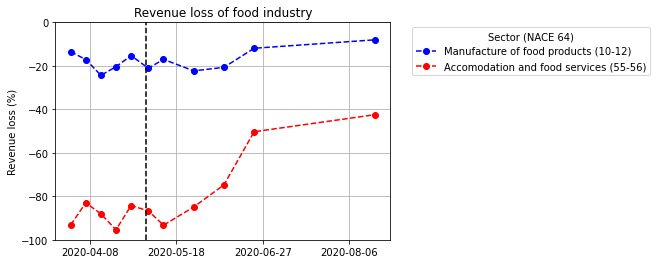

In [89]:
# Manufacture of food products

fig,ax = plt.subplots()

ax.plot(datetime_dates,df.loc['10-12'],color='blue',ls='--',marker='o')
ax.plot(datetime_dates,df.loc['55-56'],color='red',ls='--',marker='o')

ax.set_ylim([-100,0])
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.axvline(datetime.datetime.strptime('2020-05-04',"%Y-%m-%d"),color='black',ls='--')
ax.set_ylabel('Revenue loss (%)')
ax.set_title('Revenue loss of food industry')
lgd=ax.legend(['Manufacture of food products (10-12)', 'Accomodation and food services (55-56)'], title='Sector (NACE 64)', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid('on')
fig.savefig('food_sector.jpg',dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')

In [90]:
writer = pd.ExcelWriter('../../data/interim/economical/ERMG_revenue_survey.xlsx')
df.to_excel(writer, sheet_name=date[j])
writer.save()